In [3]:
# Load the Heart Failure Dataset
import pandas as pd
# pandas for handling tabular data

import numpy as np
# numpy for numerical operations, arrays

import matplotlib.pyplot as plt
# matplotlib for plotting graphs and charts

import seaborn as sns
# seaborn for statistical data visualization

from scipy import stats
# scipy.stats for statistical tests

import warnings
warnings.filterwarnings('ignore')
# warnings to manage warning messages in Python

# Set style for better-looking-plots
plt.style.use('seaborn-v0_8-darkgrid')
# Use seaborn’s dark grid style for matplotlib plots

sns.set_palette("husl")
# Set seaborn color palette (husl = distinct hues)

In [4]:
# Load the Heart Failure dataset
print("Loading Heart Failure dataset...")
df = pd.read_csv('heart_failure_dataset.csv')

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(df.columns.tolist())
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset Info:")
print(df.info())
print(f"\nBasic Statistics:")
print(df.describe())

# anaemia = 0 or 1, whether the patient has low red blood cells
# creatinine_phosphokinase = levels of creatinine phosphokinase enzyme in blood. High values indicate heart muscle damage 
# diabetes = 0 or 1, whether the patient has diabetes.
# ejection_fraction = how fast heart pumps blood. Percentage of blood leaving heart each time. Normal: 55-70%. Lower values mean weaker heart.
# high_blood_pressure = 0 or 1, whether patient has hypertension.
# platelets = number of platelets in blood. They help with clotting and abnormal values may indicate health issues.
# serum_creatinine = level of creatinine in the blood. High values mean damaged kidney function.
# serum_sodium = Level of sodium in the blood. Sodium is linked to worse outcomes in heart failure.
# sex = 0 or 1, 0 is female and 1 is male.
# smoking = 0 or 1, 0 is non-smoker and 1 is smoker.
# time = follow-up period (in days). Represents how long the patient was observed.
# DEATH_EVENT = 0 or 1, 0 means the patient survived during follow-up and 1 means patient died during follow-up. 

Loading Heart Failure dataset...

Dataset loaded successfully!
Shape: (299, 13)
['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

First few rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00    

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

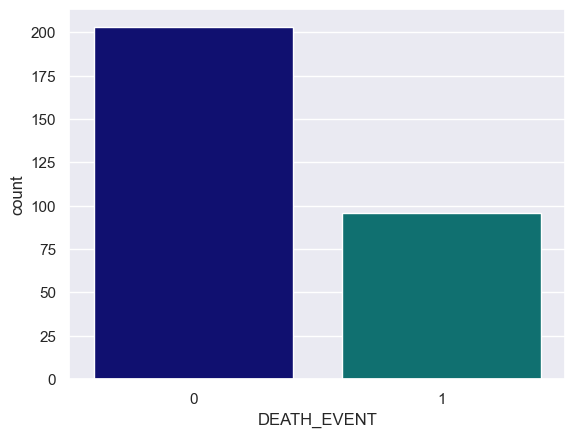

In [16]:
cols= ["#000080","#008080"]
sns.countplot(x= df["DEATH_EVENT"], palette= cols)

# Bar plot of death and count of how many people

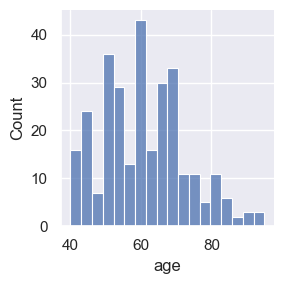

In [20]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="age",
    binwidth=3, height=3,
)

# Histogram of age and count of how many people

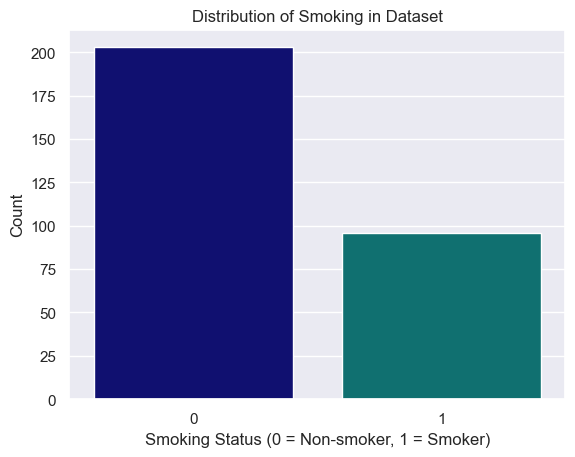

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="smoking", data=df, palette=["#000080", "#008080"])
plt.xlabel("Smoking Status (0 = Non-smoker, 1 = Smoker)")
plt.ylabel("Count")
plt.title("Distribution of Smoking in Dataset")
plt.show()

# Bar plot of smoking and count of how many people

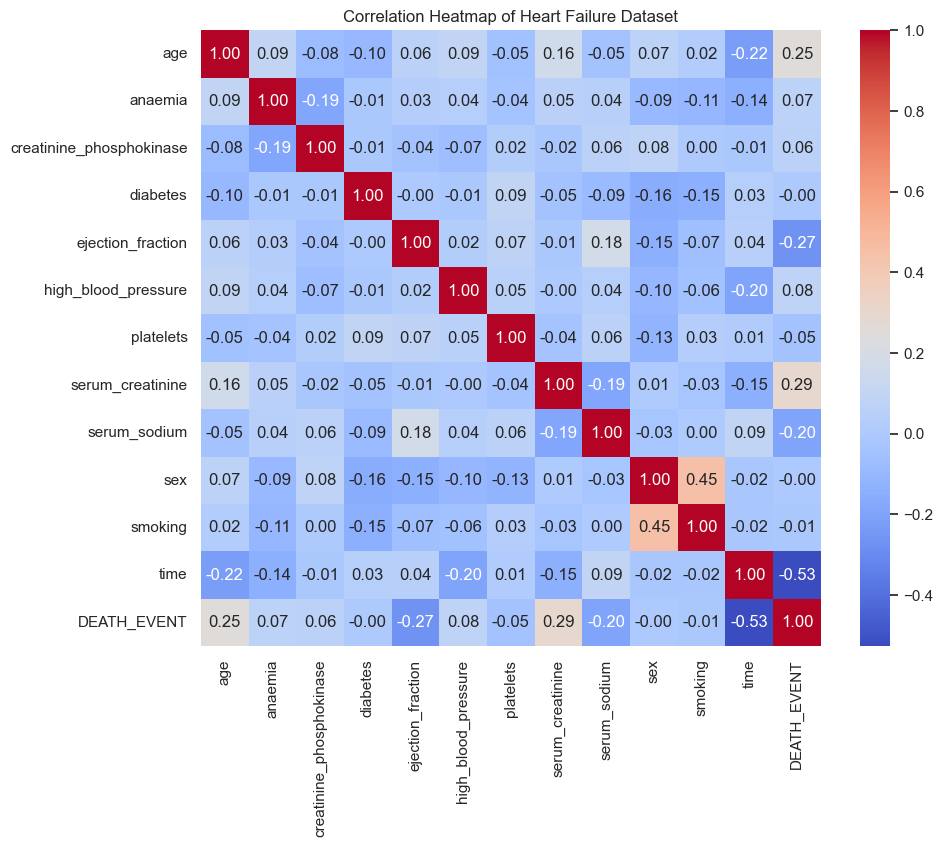

In [6]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Heart Failure Dataset")
plt.show()

# Correlation of multiple variables with each other. 1 = strong (+) correlation, 0 = no correlation, -1 = strong (-) correlation

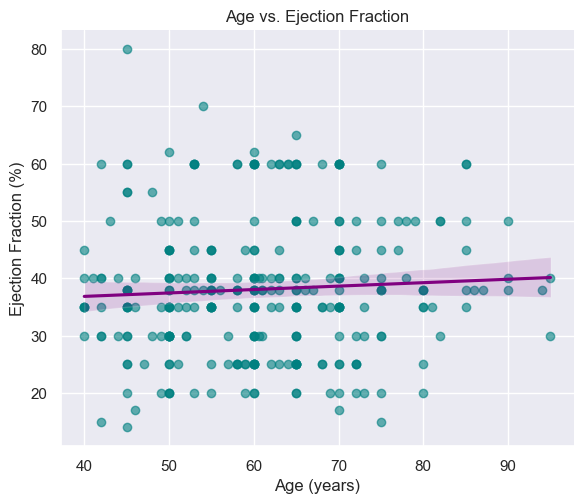

In [37]:
sns.lmplot( data=df, x="age", y="ejection_fraction", height=5, aspect=1.2,
    scatter_kws={"alpha":0.6, "color":"#008080"},
    line_kws={"color":"#800080"}
)

plt.title("Age vs. Ejection Fraction")
plt.xlabel("Age (years)")
plt.ylabel("Ejection Fraction (%)")
plt.show()

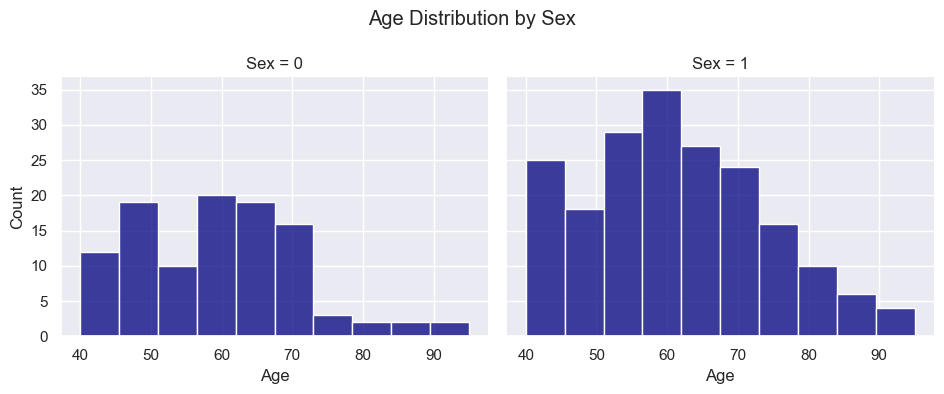

In [21]:
sns.set_theme(style="darkgrid")

# Create FacetGrid for age distribution by sex
g = sns.FacetGrid(df, col="sex", height=4, aspect=1.2, margin_titles=True)
g.map(sns.histplot, "age", bins=10, color="#000080")

# Add titles and labels
g.set_axis_labels("Age", "Count")
g.set_titles(col_template="Sex = {col_name}")
plt.suptitle("Age Distribution by Sex")
plt.tight_layout()
plt.show()

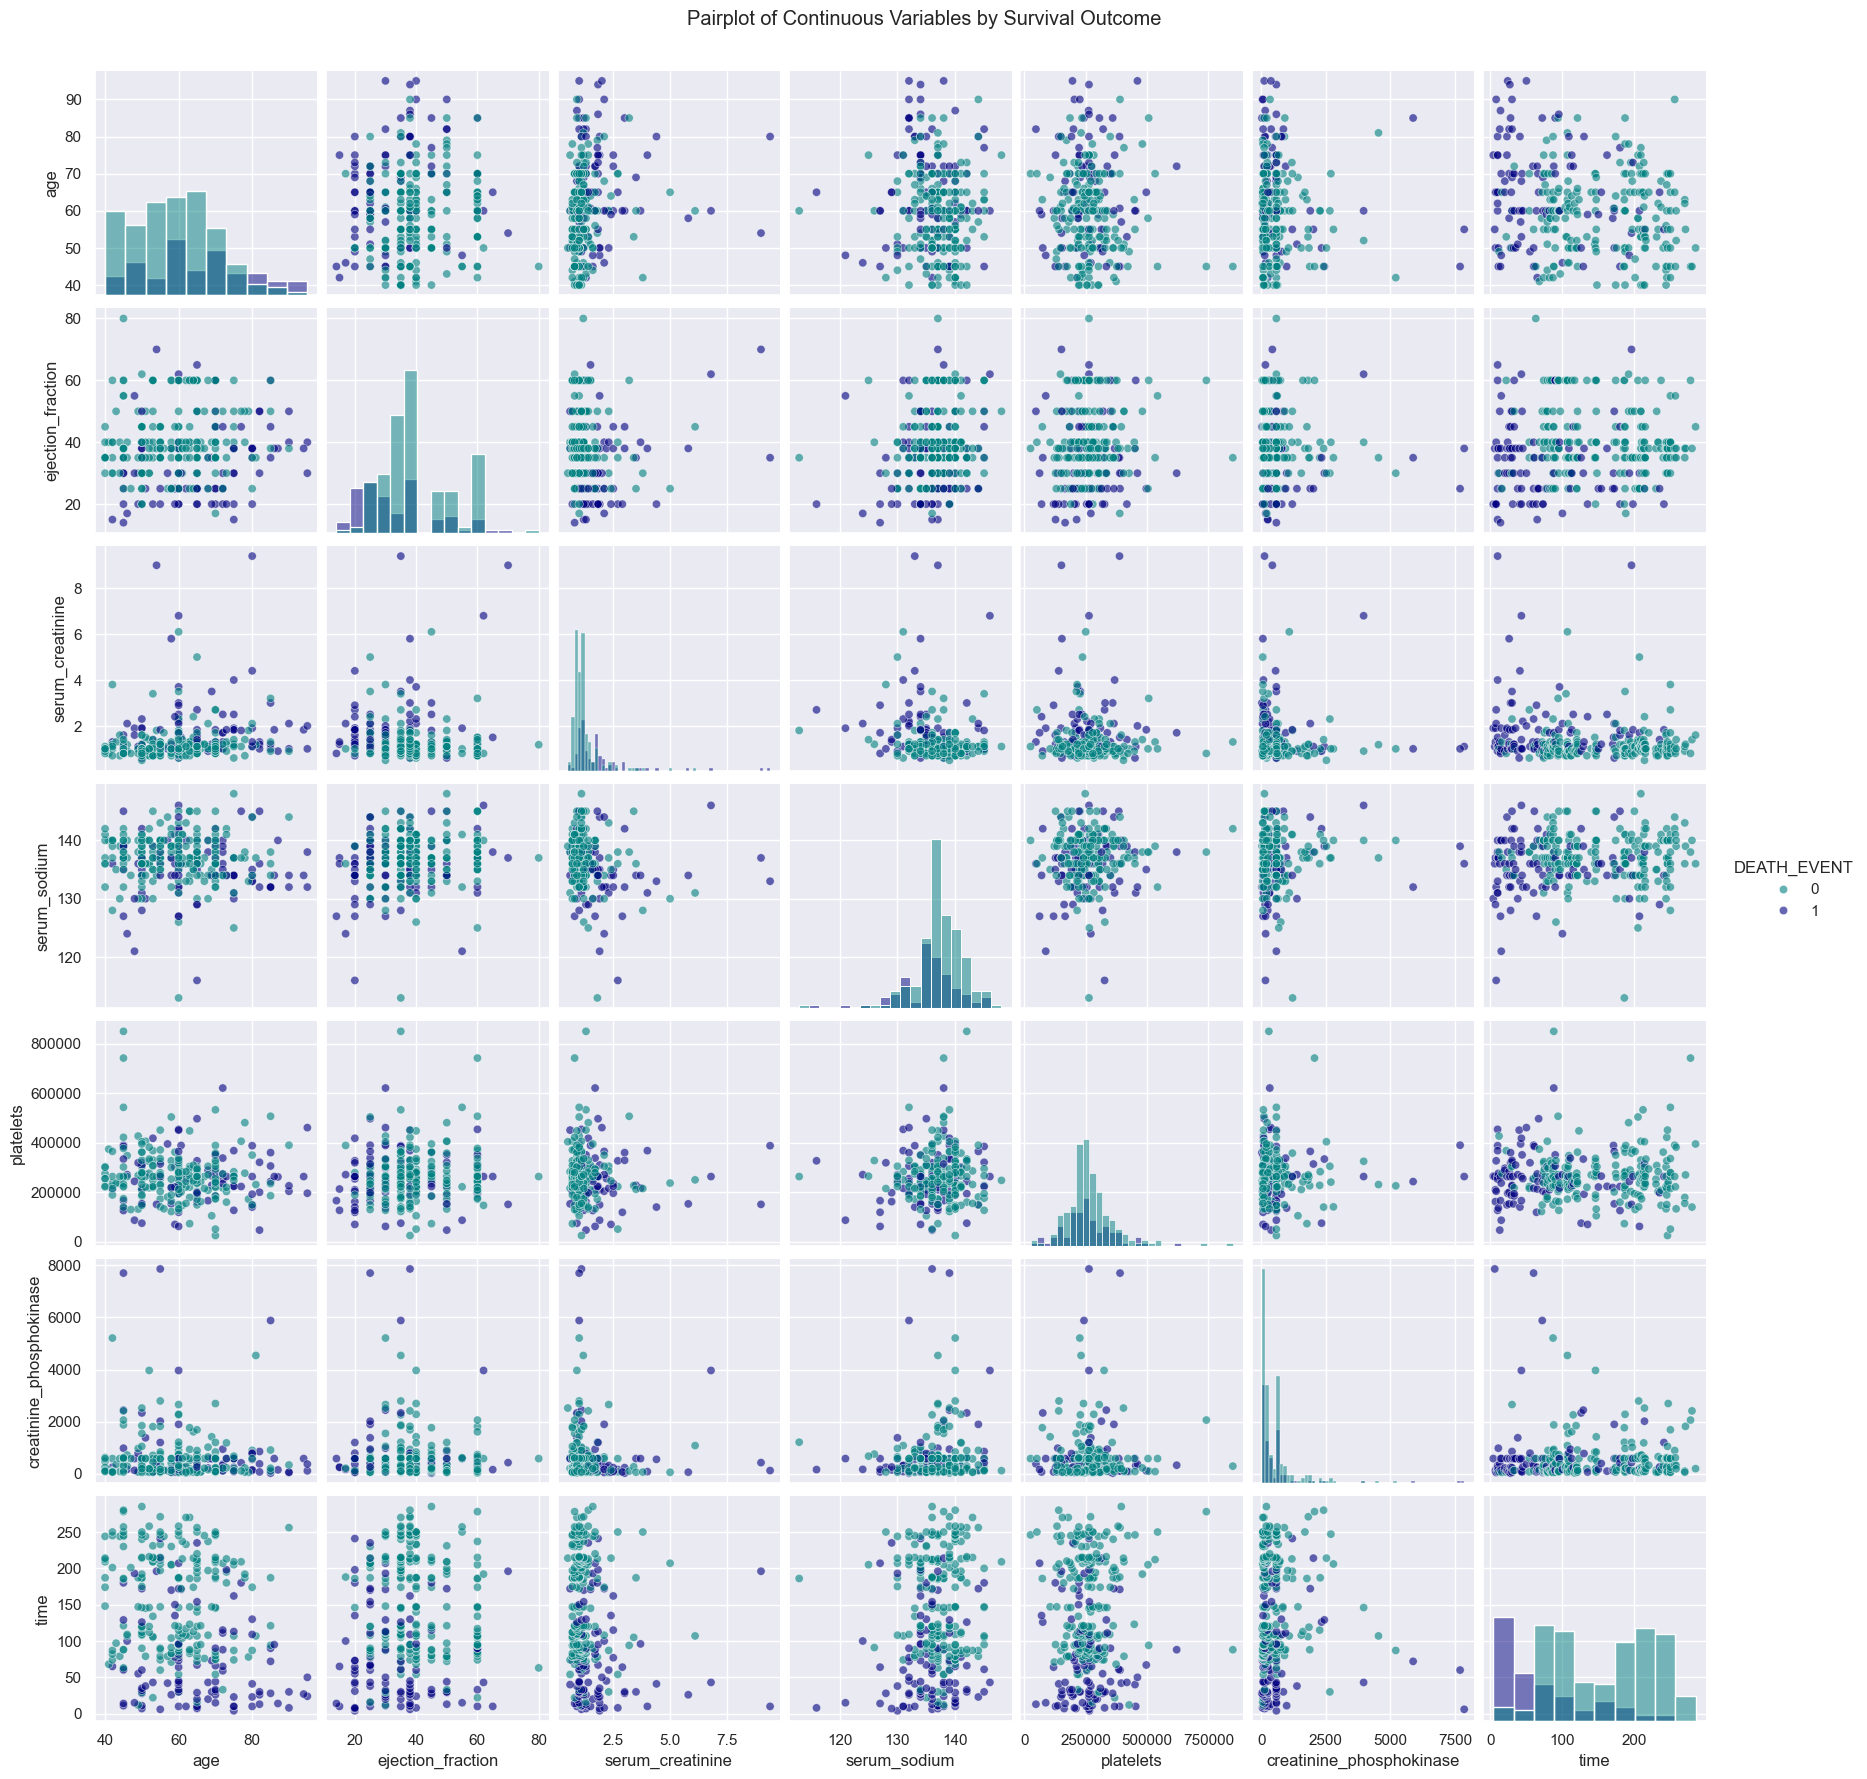

In [23]:
sns.set_theme(style="darkgrid")

# Select continuous variables for pairplot
cont_vars = [
    "age",
    "ejection_fraction",
    "serum_creatinine",
    "serum_sodium",
    "platelets",
    "creatinine_phosphokinase",
    "time"
]

# Create pairplot
sns.pairplot(
    df[cont_vars + ["DEATH_EVENT"]],
    hue="DEATH_EVENT",        # color points by survival outcome
    palette=["#008080", "#000080"],
    diag_kind="hist",         # histogram on the diagonal
    plot_kws={"alpha":0.6}    # transparency for scatter points
)

plt.suptitle("Pairplot of Continuous Variables by Survival Outcome", y=1.02)
plt.show()

first-order fit coefficients: [ -1.462 219.204]
second-order fit coefficients: [-2.486e-02  1.687e+00  1.231e+02]


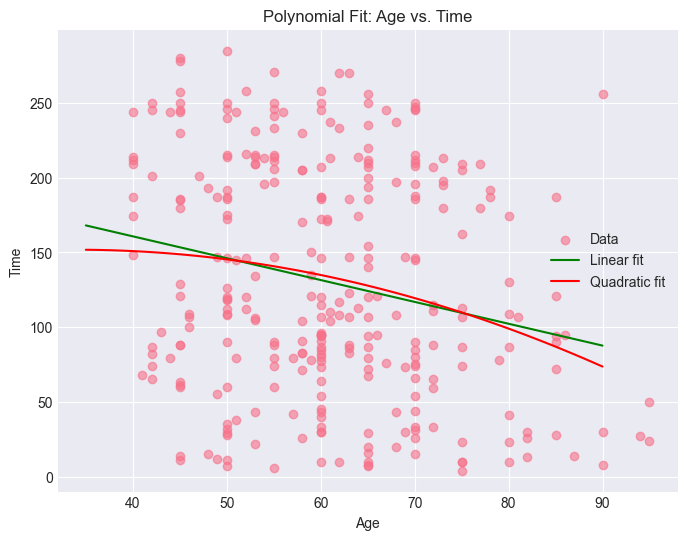

In [31]:
# importing numpy for mathematical equations, matplot for plotting.
import numpy as np
import matplotlib.pyplot as plt

# defining range of x values
xmin = 35
xmax = 90

# defining the x-axis and y-axis data values from the dataset
x = df["age"].values
y = df["time"].values

# computing the coefficient variable for first degree polynomial and second degree polynomial
coeff1 = np.polyfit(x, y, 1)
coeff2 = np.polyfit(x, y, 2)

# fit the linear models to the noisy data
xfit = np.linspace(xmin, xmax, 100)
yfit1 = np.poly1d(coeff1)(xfit)
yfit2 = np.poly1d(coeff2)(xfit)

# print the linear and polynomial coefficients
pfit1 = np.poly1d(coeff1)
print(f"first-order fit coefficients: {coeff1}")
pfit2 = np.poly1d(coeff2)
print(f"second-order fit coefficients: {coeff2}")

# plot the raw data into a regression fit graph 
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label="Data")
plt.plot(xfit, yfit1, 'g-', label="Linear fit") # linear
plt.plot(xfit, yfit2, 'r-', label="Quadratic fit") # quadratic
plt.xlabel("Age")
plt.ylabel("Time")
plt.title("Polynomial Fit: Age vs. Time")
plt.legend()
plt.show()


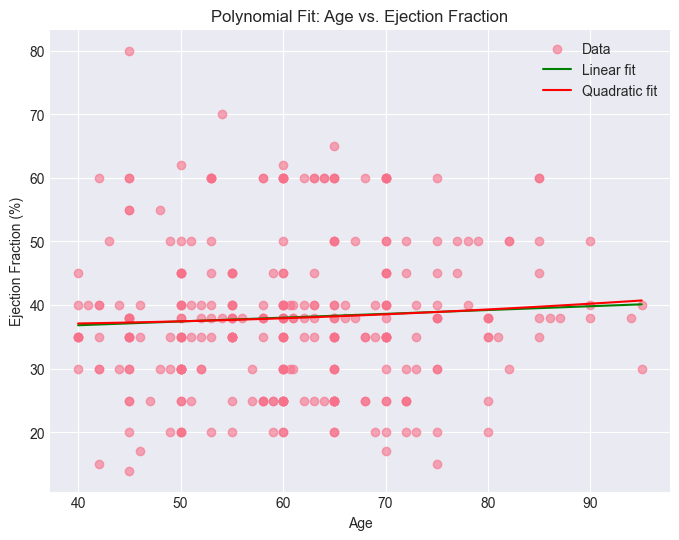

data generation coefficients: [1, -1, 0.5, -1.5, 2, 5]
fit coefficients: [ 1.004 -0.999  0.504 -1.498  1.998  4.998]


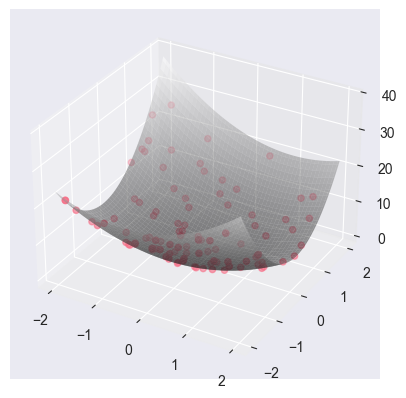

In [35]:


xmin = ymin = -2
xmax = ymax = 2
noise = 0.05
npts = 100
np.set_printoptions(precision=3)
np.random.seed(10)
c = [1,-1,0.5,-1.5,2,5]
print(f"data generation coefficients: {c}")
x = xmin+(xmax-xmin)*np.random.rand(npts) # generate random x
y = ymin+(ymax-ymin)*np.random.rand(npts) # generate random y
z = c[0]+c[1]*x+c[2]*y+c[3]*x*y+c[4]*x*x+c[5]*y*y+np.random.normal(0,noise,npts) # evaluate polynomial and add noise
M = np.c_[np.ones(npts),x,y,x*y,x*x,y*y] # construct Vandermonde matrix
cfit,residuals,rank,values = np.linalg.lstsq(M,z) # do least-squares fit
print(f"fit coefficients: {cfit}")
fig = plt.figure()
fig.canvas.header_visible = False
ax = fig.add_subplot(projection='3d') # add 3D axes
ax.scatter(x,y,z)
xfit = np.linspace(xmin,xmax,npts)
yfit = np.linspace(ymin,ymax,npts)
Xfit,Yfit = np.meshgrid(xfit,yfit)
Zfit = cfit[0]+cfit[1]*Xfit+cfit[2]*Yfit+cfit[3]*Xfit*Yfit+cfit[4]*Xfit*Xfit+cfit[5]*Yfit*Yfit # evaluate fit surface
ax.plot_surface(Xfit,Yfit,Zfit,cmap='gray',alpha=0.5) # plot fit surface
plt.show()